In [150]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# Find the solution using the Backtracking with pruning the search tree
def SubsetSum(w, M, x, S, i, T, print_solution = False, iterations = 0):
    
    iterations += 1
    if(S == M):
        if print_solution:
            print(GetSet(w,x))
        return iterations
    else:
        if ( S + T >= M ):
            x[i] = 0;
            iterations = SubsetSum(w, M, x, S, i+1, T - w[i], print_solution, iterations)
            if ( S + w[i] <= M ):
                x[i] = 1;
                iterations = SubsetSum(w, M, x, S + w[i], i+1, T - w[i], print_solution, iterations)
    
    return iterations

# Find the solution using the Backtracking without pruning the search tree
def SubsetSum2(w, M, x, S, i, print_solution = False, iterations = 0):
    
    iterations += 1
    if(i == len(w)):
        if(S == M):
            if print_solution:
                print(GetSet(w,x))
            return iterations
    else:
        x[i] = 0
        iterations = SubsetSum2(w, M, x, S, i+1, print_solution, iterations)
        x[i] = 1
        iterations = SubsetSum2(w, M, x, S + w[i], i+1, print_solution, iterations)   
    
    return iterations

# Find the solution using the approach of testing all subsets
def TestAllCombinations(w, M, print_solution = False):
    
    combinations, iterations = AllSubsets(w, np.zeros(len(w), dtype=int), M)
    
    for i in range(0,len(combinations)):
        iterations += 1
        if sum(combinations[i]) == M:
            if print_solution:
                print(combinations[i])
            
    return iterations

# Find all subsets of a given set
def AllSubsets(w, x, M, index=0, allSets = [], iterations = 0):
    
    iterations += 1
    if(index == len(w)):
        allSets.append(GetSet(w,x))
        return allSets, iterations
    else:
        x[index] = 0
        allSets, iterations = AllSubsets(w, x, M, index+1, allSets, iterations)
        x[index] = 1
        allSets, iterations = AllSubsets(w, x, M, index+1, allSets, iterations)
    
    return allSets, iterations

# Find all permutations of a given set
def AllPermutations(w, index=0):
    
    if(index == len(w)):
        print(w)

    for i in range(index,len(w)):
        w[i], w[index] = w[index], w[i]
        AllPermutations(w, index+1)
        w[index], w[i] = w[i], w[index]
        
# Returns a set after binary mapping
def GetSet(w, x):
    setW = []
    for i in range(0,len(x)):
        if x[i] == 1:
            setW.append(w[i])
    return setW

In [152]:
x = [7,9,11,13,15]             # Different input sizes
samples = 10                   # Quantity of samples to be averaged
backtrack_with_pruning = []    # Quantity of iterations in Backtracking with pruning the search tree
backtrack_without_pruning = [] # Quantity of iterations in Backtracking without pruning the search tree
testing_all_subsets = []       # Quantity of iterations using the approach of testing all subsets

In [153]:
# Calculate the average iterations of all approaches
for i in range(len(x)):
    order_list = []
    for j in range (1,x[i]+1):
        order_list.append(j)
        
    it1, it2, it3 = 0, 0, 0
    sum_list = sum(order_list)
    zeros = np.zeros(len(order_list), dtype=int)
    
    for k in range (0,samples):
        M = random.randint(order_list[0],sum_list)
        iterations1 = SubsetSum(order_list, M, zeros.copy(), 0, 0, sum_list)
        iterations2 = SubsetSum2(order_list, M, zeros.copy(), 0, 0)
        iterations3 = TestAllCombinations(order_list, M)
        it1 = it1 + iterations1
        it2 = it2 + iterations2
        it3 = it3 + iterations3
        
    backtrack_with_pruning.append(it1/samples)
    backtrack_without_pruning.append(it2/samples)
    testing_all_subsets.append(it3/samples)

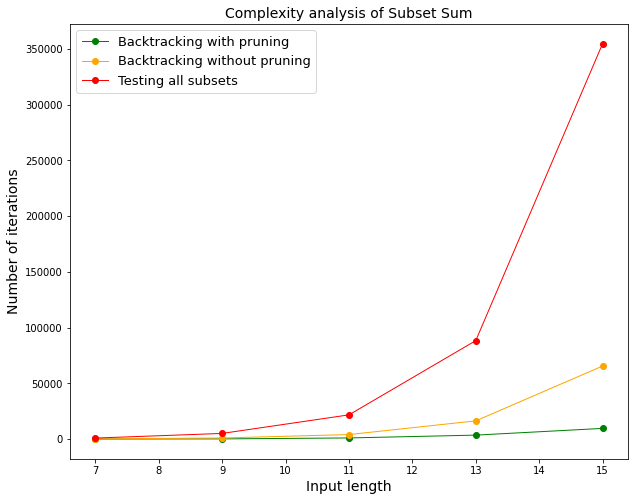

In [154]:
# Plots the complexity graph
plt.figure(figsize=(10, 8))
plt.plot(x,backtrack_with_pruning, c="green", ls="-", lw = 1, marker="o", label="Backtracking with pruning")
plt.plot(x,backtrack_without_pruning, c="orange", ls="-",  lw = 1, marker="o", label="Backtracking without pruning")
plt.plot(x,testing_all_subsets, c="red", ls="-",  lw = 1, marker="o", label="Testing all subsets")
plt.title("Complexity analysis of Subset Sum",fontsize=14)
plt.xlabel("Input length",fontsize=14)
plt.ylabel("Number of iterations",fontsize=14)
plt.legend(fontsize=13)
plt.show()